# Import data

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
from utils import get_train_data_only

df_teams, df_BLUE, df_RED = get_train_data_only()

In [69]:
#How many data points we have
len(df_teams), len(df_BLUE) 

(28256, 141280)

# Feature Engineering

In [14]:
import numpy as np
import pandas as pd

In [47]:
df_b = df_BLUE.groupby('champion_id').count()
df_r = df_RED.groupby('champion_id').count()
df_frequency = pd.DataFrame(df_b.max(axis=1), columns=['champ_id_blue'])
df_frequency['champ_id_red'] = df_r.max(axis=1)
df_frequency.sample(5)

,champ_id_blue,champ_id_red
champion_id,,
48,1945,2054
75,25,30
126,1356,1147
17,12,15
110,2138,2200


<AxesSubplot:xlabel='champion_id'>

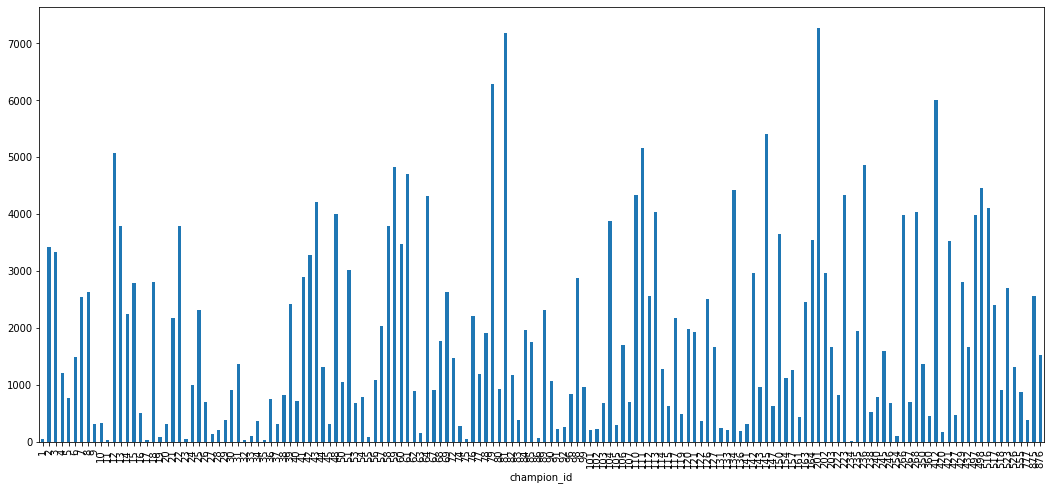

In [60]:
#total times a champion played
df_frequency.sum(axis=1).plot.bar(figsize=(18,8))

In [70]:
min_played = df_frequency.sum(axis=1).min()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == min_played]

champion_id
234    9
dtype: int64

In [71]:
max_played = df_frequency.sum(axis=1).max()
df_frequency.sum(axis=1)[df_frequency.sum(axis=1) == max_played]

champion_id
201    7276
dtype: int64

## Synergy between champions in the same team

In [317]:
df_BLUE[['champion_id', 'win', 'game_id']]

,champion_id,win,game_id
0,36,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
1,5,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
2,69,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
3,81,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
4,25,False,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
...,...,...,...
141275,41,False,LCK/2019 Season/Summer Season/Scoreboards/Week...
141276,113,False,LCK/2019 Season/Summer Season/Scoreboards/Week...
141277,42,False,LCK/2019 Season/Summer Season/Scoreboards/Week...
141278,15,False,LCK/2019 Season/Summer Season/Scoreboards/Week...


In [326]:
np.unique(df_BLUE.game_id)

array(['2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_2',
       '2016 International Wildcard Invitational/Scoreboards/Bracket Stage_2_1',
       '2016 International Wildcard Invitational/Scoreboards/Bracket Stage_2_2',
       ..., 'XLG SuperCup 2016/Scoreboards_5_2',
       'XLG SuperCup 2016/Scoreboards_6_1',
       'XLG SuperCup 2016/Scoreboards_6_2'], dtype=object)

In [ ]:
for value in df_BLUE.champion_id:
    

In [324]:
#Maybe easier to create a dictionary with two keys

from collections import defaultdict

d = defaultdict(dict)
d

defaultdict(dict, {})

## Average win rate of the champions against the opposite champions

### Win rate of champions against each of the other team's champion

In [120]:
#available_champions = list(df_frequency.index)
df_BLUE_RED = pd.merge(left=df_BLUE, right=df_RED, left_on= 'game_id', right_on= 'game_id')
df = df_BLUE_RED[['champion_id_x', 'champion_id_y', 'win_x']]#.groupby('champion_id_x').value_counts()
df

,champion_id_x,champion_id_y,win_x
0,36,126,False
1,36,113,False
2,36,142,False
3,36,50,False
4,36,223,False
...,...,...,...
706395,201,85,False
706396,201,59,False
706397,201,517,False
706398,201,81,False


In [129]:
#times that a given champion won or lost against another champion
champion_vs_champion = pd.DataFrame(df.value_counts())
champion_vs_champion

0
champion_id_x champion_id_y win_x     
12            201           True   318
498           145           True   315
412           201           True   292
201           12            False  281
                            True   276
...                                ...
105           14            False    1
                            True     1
              16            True     1
              18            False    1
91            83            True     1

[37444 rows x 1 columns]

In [164]:
champion_vs_champion.loc[(12, 201)]

/tmp/ipykernel_24966/160690174.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  champion_vs_champion.loc[(12, 201)]


,0
win_x,
True,318
False,258


In [150]:
total_champion_vs_champion = pd.DataFrame(df_BLUE_RED[['champion_id_x', 'champion_id_y']].value_counts())
total_champion_vs_champion

,,0
champion_id_x,champion_id_y,
12,201,576
201,12,557
498,145,534
412,201,509
201,412,508
...,...,...
131,10,1
92,106,1
131,9,1


In [286]:
#percentage of times that a champion has lost or won against another champion
rate_champion_vs_champion = champion_vs_champion.div(total_champion_vs_champion)
rate_champion_vs_champion

0
champion_id_x champion_id_y win_x          
1             2             False  0.500000
                            True   0.500000
              3             False  1.000000
              4             False  1.000000
              7             False  1.000000
...                                     ...
876           555           False  0.500000
              777           False  0.533333
                            True   0.466667
              875           True   0.551020
                            False  0.448980

[37444 rows x 1 columns]

In [199]:
rate_champion_vs_champion.loc[(12)]

0
champion_id_y win_x          
1             True   0.666667
              False  0.333333
2             True   0.650000
              False  0.350000
3             False  0.529412
...                       ...
777           False  0.500000
875           True   0.707317
              False  0.292683
876           False  0.518182
              True   0.481818

[293 rows x 1 columns]

In [183]:
float(rate_champion_vs_champion.loc[(12, 201, True)])

0.5520833333333334

### Blue Champions average win rate against each of the 5 red champions (later averaged per game_id)

In [311]:
champion_x = list(df_BLUE_RED.champion_id_x)
champion_y = list(df_BLUE_RED.champion_id_y)

column1 = []
column2 = []
column3 = []
column4 = []
column5 = []

for num in range(int(len(champion_x)/5)):
    try:
        column1.append(float(rate_champion_vs_champion.loc[(champion_x[5*num], champion_y[5*num], True)]))
    except:
        column1.append(0)
    try:
        column2.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+1], champion_y[5*num+1], True)]))
    except:    
        column2.append(0)
    try:
        column3.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+2], champion_y[5*num+2], True)]))
    except:
        column3.append(0)
    try:
        column4.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+3], champion_y[5*num+3], True)]))
    except:
        column4.append(0)
    try:
        column5.append(float(rate_champion_vs_champion.loc[(champion_x[5*num+4], champion_y[5*num+4], True)]))
    except:
        column5.append(0)

        
"""This cell returns each blue champion winning rate per 5 of the red team champions"""
win_rate_champion_vs_champion = pd.DataFrame(np.array([column1, column2, column3, column4, column5]).T, columns=['rate_champion_1', 'rate_champion_2', 'rate_champion_3', 'rate_champion_4', 'rate_champion_5'])
win_rate_champion_vs_champion['blue_champ_id'] = df_BLUE_RED.champion_id_x

In [310]:
"""This cell returns each blue champion avergage winning rate for the 5 champions in the red team"""
win_rate_champion_vs_champion.mean(axis=1)

0         6.384466
1         6.382893
2         6.497394
3         6.426222
4         6.424693
            ...   
141275    1.473143
141276    1.440393
141277    1.415992
141278    1.425620
141279    1.447481
Length: 141280, dtype: float64

In [306]:
"""Inlcude the average win rate of every blue champion against the 5 champions in the red team"""
df_banana = pd.merge(df_BLUE, win_rate_champion_vs_champion, left_index=True, right_index=True)
df_banana[['champion_name', 'champion_id', 'rate_champion_1','rate_champion_2','rate_champion_3','rate_champion_4','rate_champion_5']]

,champion_name,champion_id,rate_champion_1,rate_champion_2,rate_champion_3,rate_champion_4,rate_champion_5
0,Dr. Mundo,36,0.363636,0.470588,0.564103,0.434783,0.473684
1,Xin Zhao,5,0.433333,0.450000,0.500000,0.384615,0.529412
2,Cassiopeia,69,0.537037,0.556522,0.515152,0.680000,0.695652
3,Ezreal,81,0.492063,0.584718,0.455000,0.460526,0.565022
4,Morgana,25,0.479167,0.637168,0.506849,0.442623,0.482353
...,...,...,...,...,...,...,...
141275,Gangplank,41,0.689655,0.586667,0.434783,0.538012,0.589744
141276,Sejuani,113,0.550000,0.521277,0.496855,0.490066,0.584158
141277,Corki,42,0.480769,0.488584,0.526882,0.527273,0.472441
141278,Sivir,15,0.524590,0.438017,0.578947,0.472340,0.539823


In [309]:
df_BLUE_win_rate = pd.merge(df_BLUE, pd.DataFrame(win_rate_champion_vs_champion.mean(axis=1)), left_index=True, right_index=True)
df_BLUE_win_rate#[['champion_name', 'champion_id', 0]]

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id,0
0,LukasNegro,180733.0,TOP,Dr. Mundo,36,4860.0,4.0,4.0,9920,246,0,1,4,4,27971,114533,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.384466
1,Rod,196384.0,JGL,Xin Zhao,5,4508.0,5.0,2.0,9386,181,1,151,4,2,24232,146123,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.382893
2,Rakyz,194807.0,MID,Cassiopeia,69,4851.0,1.0,3.0,12262,310,1,28,0,3,21271,182752,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.497394
3,Warangelus,203963.0,BOT,Ezreal,81,6362.0,6.0,4.0,12160,280,2,15,4,4,14588,173127,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.426222
4,Shadow,212989.0,SUP,Morgana,25,3639.0,6.0,4.0,7527,21,2,0,4,4,13196,40300,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1,6.424693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141275,Khan,171549.0,TOP,Gangplank,41,4369.0,4.0,6.0,13628,291,0,8,4,6,28847,272147,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.473143
141276,Clid,126245.0,JGL,Sejuani,113,4704.0,5.0,4.0,10770,150,2,123,3,4,25724,123159,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.440393
141277,Faker,158918.0,MID,Corki,42,5234.0,3.0,2.0,15381,384,1,38,2,2,16005,259670,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.415992
141278,Teddy,200789.0,BOT,Sivir,15,5448.0,4.0,2.0,16986,426,2,39,2,2,14173,321584,False,BLUE,LCK/2019 Season/Summer Season/Scoreboards/Week...,1.425620


In [289]:
df_BLUE_mean_win_rate = df_BLUE_win_rate[['game_id', 0]].groupby('game_id').mean()
df_BLUE_mean_win_rate.reset_index(level=0, inplace=True)
df_BLUE_mean_win_rate['champion_vs_champion_mean_win_rate'] = df_BLUE_mean_win_rate[0]
df_BLUE_mean_win_rate.drop(0, axis=1, inplace=True)
df_BLUE_mean_win_rate.head(10)

,game_id,champion_vs_champion_mean_win_rate
0,2016 International Wildcard Invitational/Score...,0.525028
1,2016 International Wildcard Invitational/Score...,0.548582
2,2016 International Wildcard Invitational/Score...,0.510975
3,2016 International Wildcard Invitational/Score...,0.551953
4,2016 International Wildcard Invitational/Score...,0.574197
5,2016 International Wildcard Invitational/Score...,0.552016
6,2016 International Wildcard Invitational/Score...,0.558782
7,2016 International Wildcard Invitational/Score...,0.558787
8,2016 International Wildcard Invitational/Score...,0.553651
9,2016 International Wildcard Invitational/Score...,0.565322


## Average win rate of the champions against the opposite role champions (?)
What does opposite role mean?

In [302]:
df_BLUE[df_BLUE.role == 'MID']

,name,id,role,champion_name,champion_id,gold_15,kills_assists_15,deaths_15,total_gold,total_cs,total_kills,total_monster_kills,total_assists,total_deaths,total_damage_taken,total_damage_dealt,win,side,game_id
2,Rakyz,194807.0,MID,Cassiopeia,69,4851.0,1.0,3.0,12262,310,1,28,0,3,21271,182752,False,BLUE,Rift Rivals 2018/LLN-CLS-CBLOL/Scoreboards_6_1
7,toucouille,304720.0,MID,Lucian,236,5610.0,2.0,4.0,9449,235,1,12,1,4,11431,111742,False,BLUE,LFL/2020 Season/Summer Season/Scoreboards/Week...
12,Piqueos,350566.0,MID,Corki,42,5311.0,6.0,5.0,14073,327,3,48,3,5,19397,235531,False,BLUE,Guardians League/2020 Season/Opening Playoffs/...
17,tockers,201599.0,MID,Ryze,13,5951.0,8.0,0.0,15417,327,4,49,4,0,8535,267664,True,BLUE,CBLOL/2018 Season/Split 2 Playoffs/Scoreboards...
22,Decay,296711.0,MID,Irelia,39,4912.0,2.0,5.0,8985,216,1,1,1,5,14907,112206,False,BLUE,PG Nationals/2018 Season/Summer Season/Scorebo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141257,Claire,126125.0,MID,Akali,84,5261.0,8.0,2.0,12181,255,6,4,2,2,19718,144009,False,BLUE,OPL/2019 Season/Split 2 Playoffs/Scoreboards_4_2
141262,Jiizuke,169218.0,MID,Taliyah,163,5813.0,7.0,2.0,13690,331,2,32,5,2,8051,368062,True,BLUE,EU LCS/2018 Season/Spring Season/Scoreboards/W...
141267,Adept,292286.0,MID,Cassiopeia,69,5333.0,10.0,8.0,13608,303,3,22,7,8,23122,181714,False,BLUE,Nordic Championship/2019 Season/Spring Season/...
141272,Abbedagge,188687.0,MID,Syndra,134,4842.0,2.0,4.0,10082,237,2,8,0,4,14801,143355,False,BLUE,TCL/2017 Season/Winter Season/Scoreboards/Week...


# ML model

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn import set_config; set_config(display='diagram')


# Impute then Scale for numerical variables: 
num_transformer = make_pipeline(
                    SimpleImputer(strategy = 'mean'),
                    MinMaxScaler())

# Encode categorical variables
cat_transformer = OneHotEncoder(sparse = False)#, handle_unknown='ignore')

# Paralellize "num_transformer" and "One hot encoder"
preproc = make_column_transformer(
    (num_transformer, make_column_selector(dtype_include=['float64'])),
    (cat_transformer, make_column_selector(dtype_include=['object','bool'])),
    remainder='passthrough')

#add model
pipe = make_pipeline(preproc, LogisticRegression(solver='liblinear'))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb86e4cb4f0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb86e4cb4c0>)])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [35]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit(df_normalized_teams.winner).transform(df_normalized_teams.winner)
X_pre = df_BLUE.drop(['name', 'id', 'win', 'champion_id', 'side'], axis=1).groupby('game_id').sum()
X = X_pre

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35320 entries, 2016 International Wildcard Invitational/Scoreboards/Bracket Stage_1_1 to XLG SuperCup 2016/Scoreboards_6_2
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gold_15              35320 non-null  float64
 1   kills_assists_15     35320 non-null  float64
 2   deaths_15            35320 non-null  float64
 3   total_gold           35320 non-null  int64  
 4   total_cs             35320 non-null  int64  
 5   total_kills          35320 non-null  int64  
 6   total_monster_kills  35320 non-null  int64  
 7   total_assists        35320 non-null  int64  
 8   total_deaths         35320 non-null  int64  
 9   total_damage_taken   35320 non-null  int64  
 10  total_damage_dealt   35320 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.2+ MB


In [44]:
df_BLUE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 172701 non-null  object 
 1   id                   172701 non-null  float64
 2   role                 176600 non-null  object 
 3   champion_name        176600 non-null  object 
 4   champion_id          176600 non-null  int64  
 5   gold_15              176520 non-null  float64
 6   kills_assists_15     176575 non-null  float64
 7   deaths_15            176575 non-null  float64
 8   total_gold           176600 non-null  int64  
 9   total_cs             176600 non-null  int64  
 10  total_kills          176600 non-null  int64  
 11  total_monster_kills  176600 non-null  int64  
 12  total_assists        176600 non-null  int64  
 13  total_deaths         176600 non-null  int64  
 14  total_damage_taken   176600 non-null  int64  
 15  total_damage_deal

In [38]:
# Train pipeline
pipe.fit(X_train,y_train)

# Score model
pipe.score(X_test,y_test)

0.5325154426904598

In [39]:
from sklearn.model_selection import cross_val_score

# Cross validate pipeline
cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()

0.537398581724408

In [40]:
# Check predictions
pipe.predict(X_test.iloc[0:5]), y_test[0:5]

(array([0, 0, 0, 0, 0]), array([0, 1, 0, 1, 1]))

In [41]:
from sklearn import metrics

predicted = pipe.predict(X_test)
print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted)) 

0.5325154426904598
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      6207
           1       0.00      0.00      0.00      5449

    accuracy                           0.53     11656
   macro avg       0.27      0.50      0.35     11656
weighted avg       0.28      0.53      0.37     11656



/home/stephy/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
np.unique(predicted)

array([0])

In [46]:
model = pipe[-1]

In [47]:
model.coef_

array([[-1.40395486e-10, -6.63069850e-11, -4.21767914e-11,
        -3.36859164e-06, -6.54788583e-08, -3.95464568e-09,
        -6.88579470e-09, -6.64205139e-09, -3.04656228e-09,
        -4.01736383e-07,  1.15474872e-07]])